### Skript to Visualize 
package mathplotlip 

In [ ]:
import matplotlib.pyplot as plt
import common_paths
import pandas as pd
import numpy as np

In [49]:
#area.to_csv(common_paths.DATA.joinpath("dwd/area_Brandenburg.csv"))
df_number = pd.read_csv(common_paths.DATA.joinpath("dwd/nr_Brandenburg.csv"))
df_area   = pd.read_csv(common_paths.DATA.joinpath("dwd/area_Brandenburg.csv"))
df_predict = pd.read_csv(common_paths.DATA.joinpath("dwd/final_predictions.csv"))
df_predict['time_in_months'] = df_predict['Year'] + (df_predict['Month'] - 1) / 12

df_number['time_in_months'] = df_number['Year'] + (df_number['Month'] - 1) / 12
df_area['time_in_months'] = df_area['Year'] + (df_area['Month'] - 1) / 12
df_hist = df_number.merge(df_area[['Year', 'Month', 'area']], on=['Year', 'Month'], how='left')
df_hist = df_hist[df_hist['Year'] > 1995]

In [50]:
# to show datasets
#df_predict
#df_area
#df_number.nFires.values.tolist()
df_hist


,Unnamed: 0,Year,Month,station_id,pr,sfcWind,tasmax,nFires,time_in_months,area
19,21,1996,1,164,0.2,3.384206,275.15,1.0,1996.000000,0.0
20,21,1996,1,164,0.2,3.384206,275.15,1.0,1996.000000,0.0
21,21,1996,1,164,0.2,3.384206,275.15,1.0,1996.000000,0.0
22,21,1996,1,164,0.2,3.384206,275.15,1.0,1996.000000,0.0
23,21,1996,1,164,0.2,3.384206,275.15,1.0,1996.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
130721,8380,2022,12,7389,40.7,2.840331,290.05,0.0,2022.916667,0.0
130722,8380,2022,12,7389,40.7,2.840331,290.05,0.0,2022.916667,0.0
130723,8380,2022,12,7389,40.7,2.840331,290.05,0.0,2022.916667,0.0
130724,8380,2022,12,7389,40.7,2.840331,290.05,0.0,2022.916667,0.0


In [ ]:

#uniqu = np.unique(df_number['nFires'].values)
df_number.info()
df_area.info()
df_predict.info()
#drop 
# TODO Dataset bearbeiten nur noch wenn ich auf die features hinauswill 

In [ ]:
#Ideen Viz für predictions 
# Eine Map für ein Monat 
#Plot und Scatter unterschiede 

In [ ]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the Axes.
plt.show()                           # Show the figure.

In [ ]:
fig = plt.figure()             # an empty figure with no Axes
fig, ax = plt.subplots()       # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# a figure with one Axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])

72    2030
73    2030
74    2030
75    2030
76    2030
77    2030
78    2030
79    2030
80    2030
81    2030
82    2030
83    2030
Name: Year, dtype: int64
1703      2000
1704      2000
1705      2000
1706      2000
1707      2000
          ... 
121819    2000
121820    2000
121821    2000
121822    2000
121823    2000
Name: Year, Length: 5384, dtype: int64


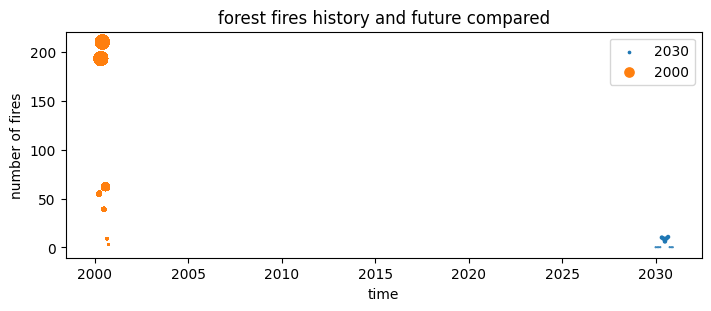

In [65]:
def compare_years(df_hist, df_predict, year_hist, year_future):
    df_hist_year = df_hist[df_hist['Year'] == year_hist]
    df_predict_year = df_predict[df_predict['Year'] == year_future]
    
    print(df_predict_year['Year'])
    print(df_hist_year['Year'])
    #df_predict_year = df_predict_year[df_predict['nr_predictions'] > 1]
    #df_hist_year = df_predict_year[df_predict['nr_predictions'] > 1]
    # real names datasets ? 
    fig, ax = plt.subplots(figsize=(7, 3), layout='constrained')
    ax.scatter('time_in_months', 'nr_predictions', s='area_predictions', data = df_predict_year, label= year_future)
    ax.scatter('time_in_months', 'nFires', s='area', data = df_hist_year, label=year_hist)
    ax.set_title('forest fires history and future compared')
    ax.set_xlabel('time')
    ax.set_ylabel('number of fires')#
    ax.legend()

compare_years(df_hist, df_predict, 2000, 2030)
# Scatter Plot of fires 


In [ ]:
# delete Zero values -> less points in graph
df_predict_nozero = df_predict[df_predict['nr_predictions'] > 1]
print(df_predict_nozero.info())
fig, ax = plt.subplots(figsize=(7, 3), layout='constrained')
ax.scatter('time_in_months', 'nr_predictions', s='area_predictions', data = df_predict_nozero)
#ax.scatter('time_in_months', 'nFires', s='area', data=df_number)
#x.scatter(data=)
ax.set_title('forest fire predictions')
ax.set_xlabel('time')
ax.set_ylabel('number of fires')